In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from tqdm import tqdm

from lib.formatter import *
from lib.conversions import *
from lib.detector_modelling import *
from lib.FT_modelling import *
from lib.synphot import *

In [31]:
pupil = pupil_from_fits("files/pupil_new_4k.fits", output_size=1024)

In [32]:
print(pupil.shape)

(1024, 1024)


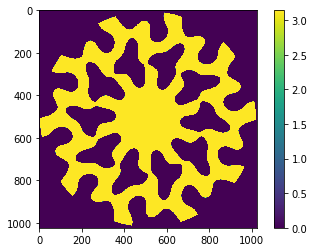

In [33]:
plt.imshow(np.angle(pupil))
plt.colorbar()

shape = pupil.shape
c = shape[0]//2

for i in range(shape[0]):
    for j in range(shape[1]):
        if np.hypot(i-c, j-c) > c:
            pupil[i][j] = 0 * np.exp(1j*0)
        elif np.angle(pupil[i][j]) >= np.pi/2:
            pupil[i][j] = np.exp(1j*np.pi)
        else:
            pupil[i][j] = np.exp(1j*0)

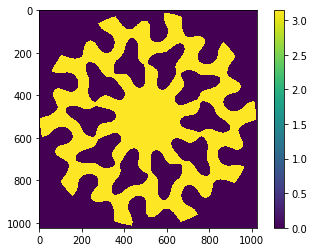

In [34]:
plt.imshow(np.angle(pupil))
plt.colorbar()

In [35]:
sag_ratio = np.angle(pupil)/(2*np.pi)
sag_val = sag_ratio*545e-6

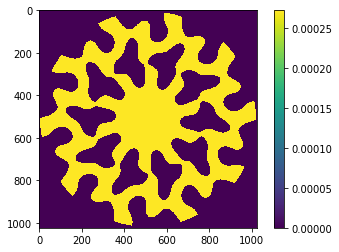

In [36]:
plt.imshow(sag_val)
plt.colorbar()

In [37]:
print(np.min(np.angle(pupil)))
print(np.max(np.angle(pupil)))

0.0
3.141592653589793


In [38]:
print(pupil.shape[0] * pupil.shape[1])

1048576


In [41]:
create_sag_file("pupil_gridsag_645_1024", pupil, 100, "mm", 645e-6)

In [11]:
# create_phase_file("test_phase_128", pupil, 100, "mm")